# Getting started with monkeys

This guide will show you how to start using `monkeys` and introduce you to the `monkeys` type system. Let's imagine a scenario: we have a number of data points representing horsepower versus miles per gallon of cars made between 1970 and 1982, and want to discover an equation that best fits this relationship. First, let's visualize our data, as taken from the [Auto MPG data set](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

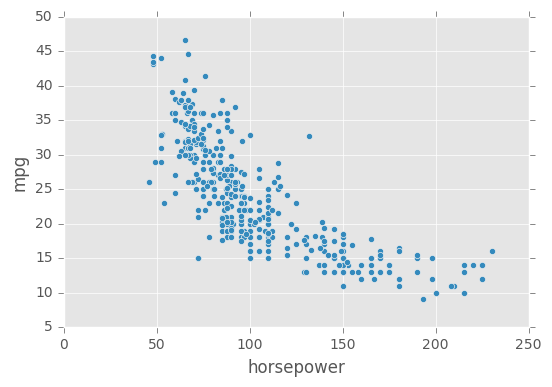

In [1]:
%matplotlib inline
import pandas
import matplotlib
matplotlib.style.use('ggplot')

df = pandas.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
    delimiter='\s+',
    header=None,
    names='mpg cylinders disp horsepower weight acceleration year origin name'.split(),
    na_values=['?'],
)
df.plot.scatter(x='horsepower', y='mpg')

As noted in the [`README.md`](https://github.com/hchasestevens/monkeys/blob/master/README.md), one of the requirements of using genetic programming is specifying what you want solutions to your problem to look like. In `monkeys`, this is accomplished through a rudimentary type system that allows you to restrict how functions can be composed together. By applying the `params` and `rtype` decorators to a function, you declare the types the function expects to receive as arguments and the type the function returns. 

Supposing we wanted to allow our equation to contain multiplication, division, addition, exponentiation, and negation, these could be declared as follows:

In [2]:
from monkeys.typing import params, rtype

@params(float, float)  # expects two floats
@rtype(float)  # returns a float
def multiply(a, b):
    return a * b

@params(float, float)
@rtype(float)
def divide(a, b):
    return a / b

@params(float, float)
@rtype(float)
def add(a, b):
    return a + b

@params(float, float)
@rtype(float)
def exponentiate(a, b):
    return a ** b

@params(float)  # expects only a single float
@rtype(float)
def negate(a):
    return -a

The `params` decorator can also be used without specifying any types. In this case, the function can be run without supplying any parameters, and is known as a "terminal" node. When creating your system, you must supply at least one terminal node - otherwise, `monkeys` won't have any "end point" at which it can stop constructing the program. In cases where we want to supply a single value of a certain type, without the need to define a function, we can use the `constant` function. Since we don't have any way of generating `float`s right now, let's declare a few.

In [3]:
from monkeys.typing import constant

one = constant(float, 1.0)
two = constant(float, 2.0)
five = constant(float, 5.0)

We also need a means of providing input to our program. This can be done using the `make_input` function, which requires us to specify the input's type, as well as the input's initial value and name optionally. 

In [4]:
from monkeys.trees import make_input

horsepower = make_input(float, name='horsepower')

We may also want to specify for clerical reasons an "Equation" type, which can be made from any program returning a float:

In [5]:
@params(float)
@rtype('Equation')  # monkeys will, if provided a string, make an Equation type for us
def equation(a):
    return a

If we want to, we can now visualize the system we've set up using `type_graph`. Note that this requires `graphviz` to be installed.

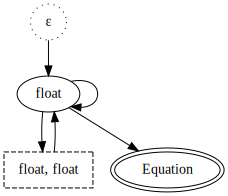

In [6]:
from monkeys.display import type_graph

type_graph()

This diagram shows the relationship between our types, and what we can construct from what. The ε at the top of the diagram in a dotted circle represents "nothing" -- this is to say, we can create `float`s out of thin air, by using our constants or our horsepower input. `float`s can be made into `float`s directly (via `negate`), or can be combined with other `float`s (resulting in a synthetic `(float, float)` type, represented as a dashed rectagle) to make `floats`, via `multiply`, `divide`, etc. If there is an obvious type we might want to generate, as is the case with `Equation`, `monkeys` will double-circle this to indicate as much.

In [7]:
df[df.horsepower.notnull()].sample(n=20)[['horsepower', 'mpg']]

,horsepower,mpg
193,81.0,24.0
28,193.0,9.0
274,103.0,20.3
381,75.0,36.0
42,180.0,12.0
25,215.0,10.0
237,63.0,30.5
9,190.0,15.0
210,108.0,19.0
108,88.0,20.0
